In [142]:
import os
import pandas as pd
import numpy as np
import functools
from matplotlib import pylab as plt
from matplotlib.pyplot import figure

In [159]:
egypt_control = pd.read_csv("../data/egypt_control/experiments.csv")
us_control = pd.read_csv("../data/us_control/experiments.csv")
clean_urls_csv = pd.read_csv("../data_collection/urls_to_test.txt", header=None)
clean_urls = list(clean_urls_csv[0])
us_broken_indices = range(6753,6793)
us_control_clean = us_control[(us_control.url.isin(clean_urls) & ~(us_control.experiment_id.isin(us_broken_indices)))]
egypt_control_clean = egypt_control[(egypt_control.url.isin(clean_urls))]
potential_dns_poisoning = egypt_control_clean[((egypt_control_clean.default_lookup_success == 0) & (egypt_control_clean.cloudflare_lookup_success == 1))]
potential_dns_poisoning_domains = potential_dns_poisoning.domain.unique()
broken_dns_us = us_control_clean[(us_control_clean.domain.isin(potential_dns_poisoning_domains) & (us_control_clean.default_lookup_success == 0))]
dns_poisoned = potential_dns_poisoning[~(potential_dns_poisoning.domain.isin(broken_dns_us.domain))]
dns_poisoned_domains = list(set(potential_dns_poisoning_domains) - set(broken_dns_us.domain))
potential_blocked = egypt_control_clean[(egypt_control_clean.page_load_success == 0)]
potential_rst = potential_blocked[(potential_blocked.page_load_status.str.startswith('net::ERR_CONNECTION_RESET'))]
empty_resp = potential_blocked[potential_blocked.page_load_status.str.startswith('net::ERR_EMPTY_RESPONSE')]
connection_refused = potential_blocked[potential_blocked.page_load_status.str.startswith('net::ERR_CONNECTION_REFUSED')]
address_unreachable = potential_blocked[potential_blocked.page_load_status.str.startswith('net::ERR_ADDRESS_UNREACHABLE')]
connection_closed = potential_blocked[potential_blocked.page_load_status.str.startswith('net::ERR_CONNECTION_CLOSED')]
navigation_timeout_exceeded = potential_blocked[potential_blocked.page_load_status.str.startswith('Navigation timeout')]
timeout = potential_blocked[potential_blocked.page_load_status.str.startswith('net::ERR_TIMED_OUT')]
cert_date_invalid = potential_blocked[potential_blocked.page_load_status.str.startswith('net::ERR_CERT_DATE_INVALID')]
too_many_redirects = potential_blocked[potential_blocked.page_load_status.str.startswith('net::ERR_TOO_MANY_REDIRECTS')]
aborted = potential_blocked[potential_blocked.page_load_status.str.startswith('net::ERR_ABORTED')]
cert_name_invalid = potential_blocked[potential_blocked.page_load_status.str.startswith('net::ERR_CERT_COMMON_NAME_INVALID')]
nonblocked_domains = egypt_control_clean[((egypt_control_clean.page_load_success == 1) & ~(egypt_control_clean.url.isin(potential_blocked.url)) & (egypt_control_clean.default_lookup_success == 1) & ~(egypt_control_clean.domain.isin(dns_poisoned_domains)))]


In [169]:
DATA_DIRECTORY = "../data"
country = 'egypt'
policies = ["geneva_def", "intang_def", "nordvpn_obfs_bridged", "tor", "torbrowser", "cloudflare", 
 "geneva+cloudflare", "cloudflare_new", 
 "nordvpn", "vpn_std_nat",
 "control_sample_nat", "control_sample_bridged",
 # 'control'
  ]

In [170]:
egypt_control_sample_bridged = pd.read_csv(f'{DATA_DIRECTORY}/egypt_control_sample_bridged/experiments.csv')
egypt_control_sample_bridged

,experiment_id,run_number,policy,domain,url,experiment_count,experiment_code,timestamp,timezone_offset,local_time,default_dns_servers,default_lookup_status,default_lookup_success,default_lookup_ips,cloudflare_lookup_status,cloudflare_lookup_success,cloudflare_lookup_ips,all_ips,page_load_success,page_load_status
0,0,0,egypt_control_sample_bridged,shahidlive.co,https://shahidlive.co/,0,shahidlive.co_0,1616721175878,-120,"3/26/2021, 3:12:55 AM","[""127.0.0.53""]",success,1,"[""212.179.121.131""]",success,1,"[""212.179.121.131""]","[""212.179.121.131""]",0,net::ERR_CONNECTION_RESET at https://shahidliv...
1,1,0,egypt_control_sample_bridged,katib.net,https://katib.net/,0,katib.net_0,1616721188286,-120,"3/26/2021, 3:13:08 AM","[""127.0.0.53""]",success,1,"[""213.108.104.110""]",success,1,"[""213.108.104.110""]","[""213.108.104.110""]",0,net::ERR_CONNECTION_RESET at https://katib.net/
2,2,0,egypt_control_sample_bridged,dailysabah.com,https://www.dailysabah.com/,0,dailysabah.com_0,1616721196456,-120,"3/26/2021, 3:13:16 AM","[""127.0.0.53""]",success,1,"[""194.36.160.50""]",success,1,"[""194.36.160.15""]","[""194.36.160.50"",""194.36.160.15""]",0,net::ERR_CONNECTION_RESET at https://www.daily...
3,3,0,egypt_control_sample_bridged,avert.org,http://www.avert.org/,0,avert.org_0,1616721204809,-120,"3/26/2021, 3:13:24 AM","[""127.0.0.53""]",success,1,"[""172.67.71.72"",""104.26.9.235"",""104.26.8.235""]",success,1,"[""104.26.9.235"",""172.67.71.72"",""104.26.8.235""]","[""172.67.71.72"",""104.26.9.235"",""104.26.8.235""]",0,Navigation timeout of 60000 ms exceeded
4,4,0,egypt_control_sample_bridged,proxylisty.com,http://proxylisty.com/,0,proxylisty.com_0,1616721272540,-120,"3/26/2021, 3:14:32 AM","[""127.0.0.53""]",success,1,"[""45.77.186.199""]",success,1,"[""45.77.186.199""]","[""45.77.186.199""]",1,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,178,0,egypt_control_sample_bridged,cima4up.co,http://cima4up.co/%D9%85%D8%B2%D9%8A%D9%83%D8%...,0,cima4up.co_0,1616723784800,-120,"3/26/2021, 3:56:24 AM","[""127.0.0.53""]",success,1,"[""104.21.235.4"",""104.21.235.3""]",success,1,"[""104.21.235.3"",""104.21.235.4""]","[""104.21.235.4"",""104.21.235.3""]",0,net::ERR_CONNECTION_RESET at http://cima4up.co...
179,179,0,egypt_control_sample_bridged,halacima.net,https://www.halacima.net/,0,halacima.net_0,1616723792271,-120,"3/26/2021, 3:56:32 AM","[""127.0.0.53""]",success,1,"[""172.67.222.141"",""104.21.43.74""]",success,1,"[""104.21.43.74"",""172.67.222.141""]","[""172.67.222.141"",""104.21.43.74""]",0,net::ERR_CONNECTION_RESET at https://www.halac...
180,180,0,egypt_control_sample_bridged,freshfreeproxy.ga,http://www.freshfreeproxy.ga,0,freshfreeproxy.ga_0,1616723799500,-120,"3/26/2021, 3:56:39 AM","[""127.0.0.53""]",success,1,"[""195.20.54.104""]",success,1,"[""195.20.54.104""]","[""195.20.54.104""]",0,net::ERR_ADDRESS_UNREACHABLE at http://www.fre...
181,181,0,egypt_control_sample_bridged,umayyapress.com,http://www.umayyapress.com,0,umayyapress.com_0,1616723808356,-120,"3/26/2021, 3:56:48 AM","[""127.0.0.53""]",success,1,"[""206.189.50.60"",""206.189.50.215""]",success,1,"[""206.189.50.60"",""3.64.200.242""]","[""206.189.50.60"",""206.189.50.215"",""3.64.200.242""]",0,net::ERR_CONNECTION_RESET at http://www.umayya...


In [171]:
dfs = {}
policies = [x for x in policies if x != 'control_clean']
dfs['control_clean'] = None
for policy in policies:
    df = pd.read_csv(f'{DATA_DIRECTORY}/{country}_{policy}/experiments.csv')
    pageload_times = []
    print(policy)
    for index, row in df.iterrows():
        if row.page_load_success == 1 and index < df.shape[0]-1 and df['run_number'].iloc[index+1] == row.run_number:
            pageload_times.append((df['timestamp'].iloc[index+1] - row.timestamp) / 1000.0)
        else:
            pageload_times.append(None)
    df["pageload_time"] = pageload_times
    dfs[policy] = df

geneva_def
intang_def
nordvpn_obfs_bridged
tor
torbrowser
cloudflare
geneva+cloudflare
cloudflare_new
nordvpn
vpn_std_nat
control_sample_nat
control_sample_bridged


In [172]:
pageload_times = {}
for index, row in egypt_control.iterrows():
    if row.page_load_success == 1 and index < egypt_control.shape[0]-1 and egypt_control['run_number'].iloc[index+1] == row.run_number:
        pageload_times[index] = [(egypt_control['timestamp'].iloc[index+1] - row['timestamp'])/1000.0]
    else:
        pageload_times[index] = [None]
egypt_control["pageload_time"] = pd.DataFrame.from_dict(pageload_times, orient='index')


In [173]:
egypt_control_clean = egypt_control[(egypt_control.url.isin(clean_urls))]
egypt_control_clean = egypt_control_clean[(egypt_control_clean.page_load_success == 1) & (egypt_control_clean.run_number == 3)]
# us_control_clean = us_control[(us_control.url.isin(clean_urls) & ~(us_control.experiment_id.isin(us_broken_indices)))]
dfs['control_clean'] = egypt_control_clean
policies.append('control_clean')

In [174]:
latencies = {}
for policy in policies:
    latencies[policy] = { 
        'pageload_time_median': dfs[policy]['pageload_time'].median(),
        'pageload_time_mean': dfs[policy]['pageload_time'].mean()
    }
latencies_data = pd.DataFrame.from_dict(latencies, orient='index')
latencies_data

,pageload_time_median,pageload_time_mean
geneva_def,14.9680,17.224396
intang_def,13.4540,15.585136
nordvpn_obfs_bridged,16.3650,18.257789
tor,16.5975,21.314429
torbrowser,19.3520,25.629799
cloudflare,13.3475,14.102587
geneva+cloudflare,15.2590,17.018119
cloudflare_new,13.5925,13.826480
nordvpn,16.5430,17.201137
vpn_std_nat,14.1730,16.823734


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

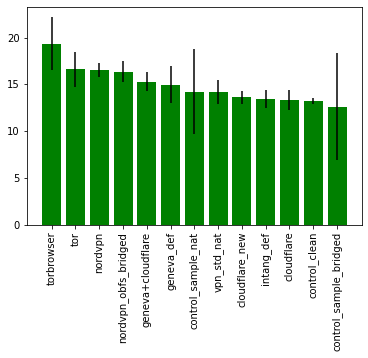

In [175]:
latencies_data_sorted = latencies_data.sort_values('pageload_time_median', ascending=False)
bar = plt.bar(latencies_data_sorted.index, latencies_data_sorted.pageload_time_median, color='green', yerr=[dfs[policy].pageload_time.std()/np.sqrt(dfs[policy].pageload_time.count())*1.96 for policy in latencies_data_sorted.index])
# figure(figsize=(10, 6), dpi=80)
# plt.savefig("test")
# lt.setp(bar.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.xticks(rotation=90)
# plt.savefig("latencies_egypt_FINAL_ack_rtt_avg")

In [176]:
max_len = max([len(list(dfs[policy].pageload_time)) for policy in policies])
pageload_time_data = pd.DataFrame.from_dict({
    policy: list(dfs[policy].pageload_time) +  ([None] * (max_len - len(dfs[policy].pageload_time))) for policy in policies 
})

In [177]:
pageload_time_data.control_clean.describe()

count    2843.000000
mean       15.626089
std         8.330307
min         7.863000
25%        11.412500
50%        13.218000
75%        15.916500
max        88.593000
Name: control_clean, dtype: float64

In [178]:
pageload_time_data.control_clean

0       14.415
1       12.730
2       12.006
3       10.696
4       10.142
         ...  
2839    12.172
2840    15.746
2841    11.214
2842    14.758
2843       NaN
Name: control_clean, Length: 2844, dtype: float64

<AxesSubplot:ylabel='Density'>

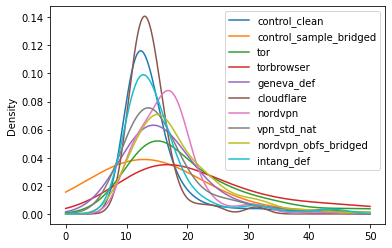

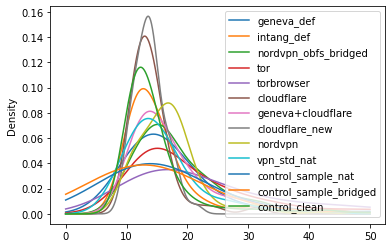

In [179]:
pageload_time_data['control_clean control_sample_bridged tor torbrowser geneva_def cloudflare nordvpn vpn_std_nat nordvpn_obfs_bridged intang_def'.split()].plot.kde(ind=np.arange(0, 50, 0.001))
pageload_time_data.plot.kde(ind=np.arange(0, 50, 0.001))

<AxesSubplot:ylabel='Density'>

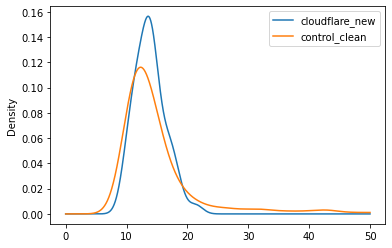

In [182]:
pageload_time_data['cloudflare_new control_clean'.split()].plot.kde(ind=np.arange(0, 50, 0.001))

<AxesSubplot:ylabel='Density'>

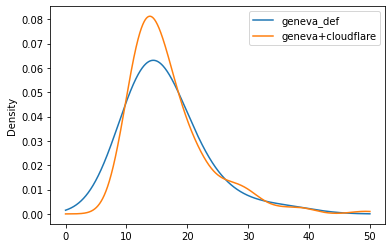

In [183]:
pageload_time_data['geneva_def geneva+cloudflare'.split()].plot.kde(ind=np.arange(0, 50, 0.001))

<AxesSubplot:ylabel='Density'>

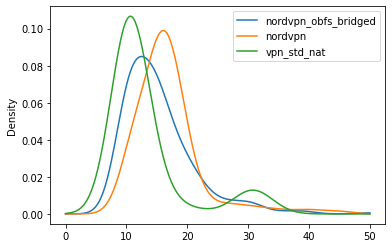

In [158]:
pageload_time_data['nordvpn_obfs_bridged nordvpn vpn_std_nat'.split()].plot.kde(ind=np.arange(0, 50, 0.001))

In [ ]:
pageload_time_data['g'.split()].plot.kde(ind=np.arange(0, 50, 0.001))

In [137]:
pageload_time_data.control_sample_bridged.max()

141.061

In [54]:
pageload_time_data.intang_def.mean()

39.95313407821229

<AxesSubplot:ylabel='Density'>

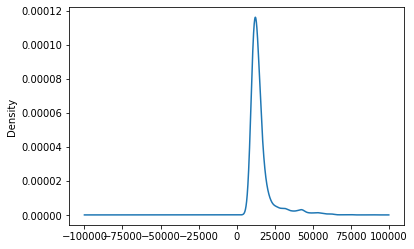

In [32]:
pageload_time_data.control_clean.plot.kde(ind=range(-100000, 100000, 2))

In [36]:
irtt_data = pd.DataFrame.from_dict({
    policy: list(packet_dfs[policy].initial_rtt) + ([None] * (max_len - len(packet_dfs[policy].initial_rtt))) for policy in [x for x in policies if x != 'torbrowser']
})
irtt_data

,control_sample_nat,control_sample_bridged,geneva_def,intang_def,nordvpn_obfs_bridged,tor,cloudflare_new,geneva+cloudflare
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.214927,0.205863,0.102764,NaN,NaN,NaN
2,NaN,0.268582,0.214927,0.205863,0.102764,NaN,NaN,NaN
3,0.225241,0.268582,0.214927,0.205863,0.102764,NaN,NaN,NaN
4,0.225241,0.268582,0.214927,0.205863,0.102764,NaN,0.196116,0.209632
...,...,...,...,...,...,...,...,...
189448,NaN,NaN,NaN,0.567478,NaN,NaN,NaN,NaN
189449,NaN,NaN,NaN,0.364666,NaN,NaN,NaN,NaN
189450,NaN,NaN,NaN,0.030629,NaN,NaN,NaN,NaN
189451,NaN,NaN,NaN,0.073630,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Density'>

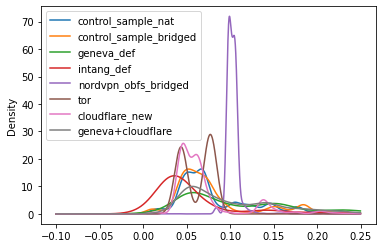

In [37]:
irtt_data.plot.kde(ind=np.arange(-0.1,0.25,0.00025))